#CHB-MIT Dataset


In [ ]:
import os
import os.path as op
import numpy as np
import pandas as pd
from scipy import signal

#Butterworth filter

In [ ]:

def Butterworth(X):
  iris = X.drop(columns = 'Time')


  df = pd.DataFrame()
  
  for i in range(1,24):
    fs = 256 # sampling frequency
    fc = 45.12 #cutoff frequency
    w = fc / (fs / 2)  #Normalize the frequency
    b, a = signal.butter(6,w,'low')
    filtered = signal.filtfilt(b, a, iris[str(i)])
    df[str(i)]=filtered
    df.columns = range(df.shape[1])
    # print(filtered)
    # result =  preprocessed_data[chan[i-1]].append(df)
  

  return df

In [ ]:
non_ictal = list()
ictal = list()
path = '/content/drive/MyDrive/Seizure detection CHB-MIT Dataset/Dataset'
dir = os.listdir(path)
print(dir)

for entry in dir:

    fullpath = os.path.join(path,entry)
    files = os.listdir(fullpath)
    for fname in files:
        df = pd.read_csv(os.path.join(fullpath,fname))
        df = Butterworth(df)

        if entry == 'Non-Seizure':
            non_ictal.append(df)

        else:
            ictal.append(df)

non_seizure = pd.DataFrame(np.concatenate(non_ictal))
seizure = pd.DataFrame(np.concatenate(ictal))
print(non_seizure)
print(seizure)

['Non-Seizure', 'Seizure']
                 0          1          2   ...         20         21          22
0        -17.781038  39.268375  -3.711440  ...  -9.176732 -39.654150  -59.969398
1         -5.503787  13.728574  -1.203803  ...  -4.239332 -15.094205  -22.245405
2          1.799692  -2.012490   0.386613  ...  -0.401114   1.138336    2.207497
3          2.668565  -5.129448   0.775283  ...   1.902680   6.363389    9.269462
4         -0.176163  -0.763524   0.402631  ...   2.735737   4.130958    4.991290
...             ...        ...        ...  ...        ...        ...         ...
1136635 -111.402015  86.023508  11.834646  ... -32.010421  -5.042652 -282.015115
1136636 -103.851057  87.483094  13.096213  ... -32.907002  -1.715023 -277.436766
1136637  -97.192188  86.929823  11.455579  ... -37.799903  -0.647948 -274.797090
1136638  -92.037080  84.250898   9.481784  ... -46.103255  -2.668000 -274.174610
1136639  -88.103492  80.291783   8.396491  ... -56.063193  -6.840859 -274.871334



#Correlation Matrix
**Non-Seizure**

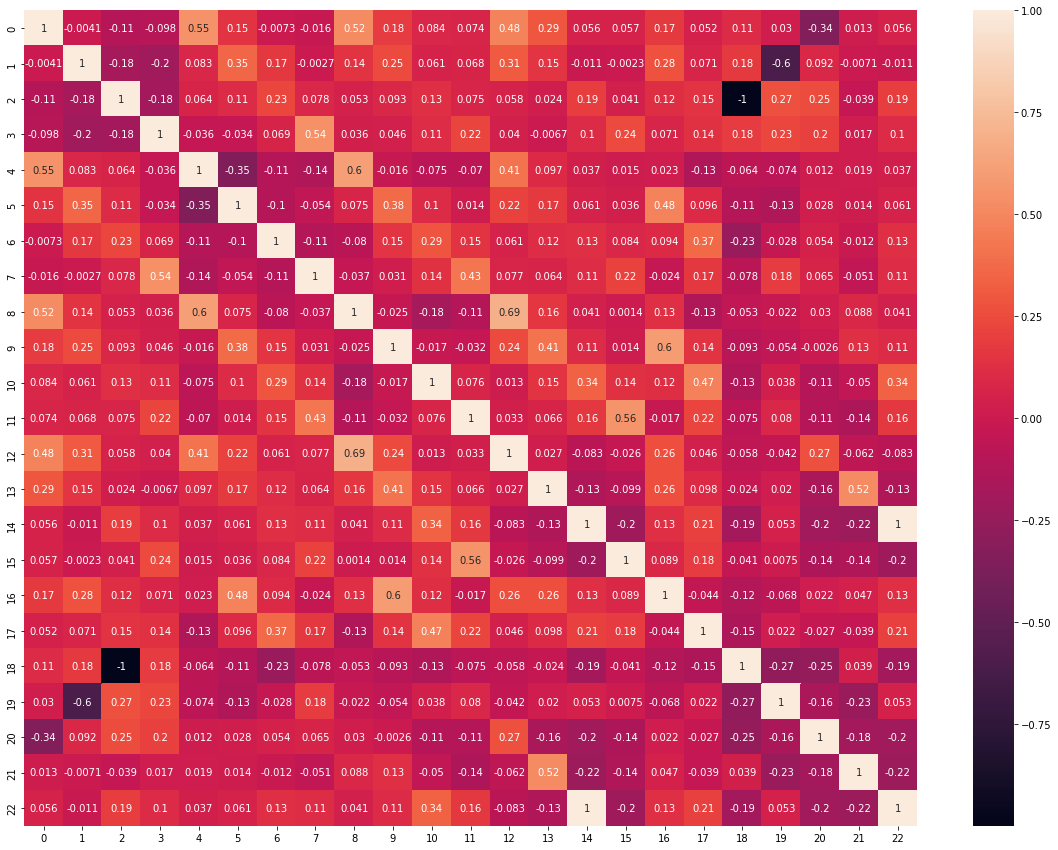

In [ ]:
import seaborn as sns

corr = non_seizure.corr()
fil,ax = plt.subplots(figsize = (20,15))
sns.heatmap(corr,annot = True,ax =ax)

**Seizure**

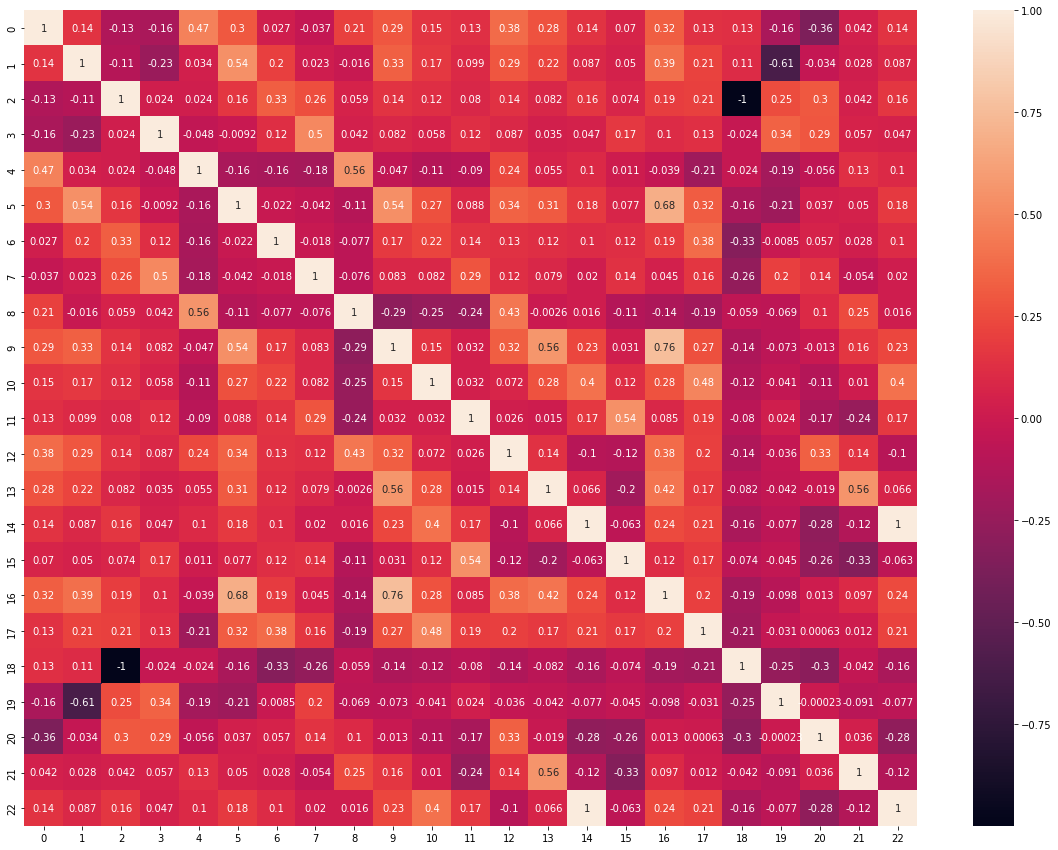

In [ ]:
corr = seizure.corr()
fil,ax = plt.subplots(figsize = (20,15))
sns.heatmap(corr,annot = True,ax =ax)

#Feature Extraction

In [ ]:
def shannon(x):
  y = np.power(x,2)
  y1 = np.sum(y)
  PE = y/y1
  SE = -np.sum(PE * np.log(np.power(PE,2)))
  return SE


In [ ]:
fs = 256
def feature_extraction(df):
  features_ext_dataframe = list()
  
  print(df)
  
  epochs = len(df)//(fs*10)
 
  for i in range(epochs):
    print(i)
    value = list()
    i = i*(fs*10)

    for chan in range(df.shape[1]):
      # print(chan)
      
      x = df.loc[i:i+(fs*10)-1,chan]
      
      # print(x)
      Var = st.variance(x)
      value.append(Var)
      Std = st.stdev(x)
      value.append(Std)
      SE  = shannon(x)
      value.append(SE)
      Kur = scst.kurtosis(x)
      value.append(Kur)
    print('segment ==========', i ,' to ',i+(fs*10)-1)
    features_ext_dataframe.append(value)
  
  return pd.DataFrame(features_ext_dataframe)


#####################################################################
non_ictal_frame = feature_extraction(non_seizure)
ictal_frame = feature_extraction(seizure)

non_ictal_frame.columns = header.columns
ictal_frame.columns = header.columns


#####################################################################



92
                 0          1          2   ...         20         21          22
0        -17.781038  39.268375  -3.711440  ...  -9.176732 -39.654150  -59.969398
1         -5.503787  13.728574  -1.203803  ...  -4.239332 -15.094205  -22.245405
2          1.799692  -2.012490   0.386613  ...  -0.401114   1.138336    2.207497
3          2.668565  -5.129448   0.775283  ...   1.902680   6.363389    9.269462
4         -0.176163  -0.763524   0.402631  ...   2.735737   4.130958    4.991290
...             ...        ...        ...  ...        ...        ...         ...
1136635 -111.402015  86.023508  11.834646  ... -32.010421  -5.042652 -282.015115
1136636 -103.851057  87.483094  13.096213  ... -32.907002  -1.715023 -277.436766
1136637  -97.192188  86.929823  11.455579  ... -37.799903  -0.647948 -274.797090
1136638  -92.037080  84.250898   9.481784  ... -46.103255  -2.668000 -274.174610
1136639  -88.103492  80.291783   8.396491  ... -56.063193  -6.840859 -274.871334

[1136640 rows x 23 colum

In [ ]:
non_ictal_frame['result'] = np.zeros(len(non_ictal_frame)).astype(int)
non_ictal_frame

,0_Variance,0_Std,0_Shannon_entropy,0_Kurtosis,1_Variance,1_Std,1_Shannon_entropy,1_Kurtosis,2_Variance,2_Std,2_Shannon_entropy,2_Kurtosis,3_Variance,3_Std,3_Shannon_entropy,3_Kurtosis,4_Variance,4_Std,4_Shannon_entropy,4_Kurtosis,5_Variance,5_Std,5_Shannon_entropy,5_Kurtosis,6_Variance,6_Std,6_Shannon_entropy,6_Kurtosis,7_Variance,7_Std,7_Shannon_entropy,7_Kurtosis,8_Variance,8_Std,8_Shannon_entropy,8_Kurtosis,9_Variance,9_Std,9_Shannon_entropy,9_Kurtosis,...,13_Std,13_Shannon_entropy,13_Kurtosis,14_Variance,14_Std,14_Shannon_entropy,14_Kurtosis,15_Variance,15_Std,15_Shannon_entropy,15_Kurtosis,16_Variance,16_Std,16_Shannon_entropy,16_Kurtosis,17_Variance,17_Std,17_Shannon_entropy,17_Kurtosis,18_Variance,18_Std,18_Shannon_entropy,18_Kurtosis,19_Variance,19_Std,19_Shannon_entropy,19_Kurtosis,20_Variance,20_Std,20_Shannon_entropy,20_Kurtosis,21_Variance,21_Std,21_Shannon_entropy,21_Kurtosis,22_Variance,22_Std,22_Shannon_entropy,22_Kurtosis,result
0,719.665414,26.826580,14.187517,0.190072,708.008118,26.608422,13.967398,0.710547,766.150082,27.679416,13.756794,1.415318,750.972585,27.403879,13.779343,1.500754,1466.879204,38.299859,13.888869,0.924912,1999.706621,44.718079,13.938611,0.674419,560.417953,23.673148,14.093116,0.220582,1234.712823,35.138481,13.837600,0.982345,1641.388749,40.514056,13.886799,1.009612,1563.641303,39.542905,13.827120,1.068362,...,30.830854,14.124028,0.461335,736.250982,27.133945,14.404848,-0.403960,1241.849379,35.239883,14.093438,0.469549,1974.245199,44.432479,13.861230,0.916163,1024.546843,32.008543,14.206313,0.143791,766.150083,27.679416,13.755893,1.415318,294.960265,17.174407,14.253468,0.066742,868.356471,29.467889,14.141766,0.100712,250.449648,15.825601,14.254483,-0.010632,736.250982,27.133945,14.404848,-0.403960,0
1,924.947826,30.412955,13.743984,1.400555,748.755217,27.363392,14.146274,0.302670,1110.020832,33.316975,13.897280,0.847124,804.357666,28.361200,13.661435,1.560339,1985.771456,44.561996,13.723591,1.510938,1834.754885,42.834039,14.288445,-0.045406,629.268041,25.085216,13.978903,0.710663,1275.819780,35.718620,13.742557,1.496790,1962.030621,44.294815,13.561415,2.131739,1286.504684,35.867878,14.047902,0.621950,...,29.888165,13.864370,1.325487,865.273522,29.415532,13.941667,0.684235,971.588244,31.170310,13.781526,1.462591,2238.313027,47.310813,14.127740,0.319927,1639.077146,40.485518,13.990199,0.788569,1110.020831,33.316975,13.902260,0.847124,375.540484,19.378867,14.189157,0.305288,1088.640046,32.994546,14.155391,0.107945,228.412274,15.113314,13.980214,0.538721,865.273522,29.415532,13.941667,0.684235,0
2,1353.019662,36.783416,13.875047,0.846071,1203.869998,34.696830,14.157850,0.169958,1410.531888,37.557048,13.600015,1.649364,770.073426,27.750197,13.586505,2.776983,3290.439318,57.362351,13.819563,0.862206,2443.489733,49.431667,14.187814,-0.056291,1132.487166,33.652447,13.935287,0.650524,1809.712223,42.540713,14.209540,0.064551,2889.332787,53.752514,14.047496,0.391151,3146.067864,56.089820,13.995432,0.519426,...,42.259090,13.934095,0.425246,1058.380331,32.532758,14.051332,0.827688,942.088346,30.693458,14.062175,0.625187,4043.606250,63.589356,14.154227,0.131811,2707.097696,52.029777,13.974250,0.509758,1410.531887,37.557048,13.602328,1.649364,654.054540,25.574490,13.828787,1.172671,1652.404357,40.649777,13.735942,1.489317,526.197037,22.938985,13.616927,1.921240,1058.380331,32.532758,14.051332,0.827688,0
3,4600.486414,67.826886,14.078013,0.435332,1695.503603,41.176493,13.806844,1.497676,2311.411741,48.077144,13.945376,0.610951,1595.923241,39.949008,14.001335,0.637268,5218.080203,72.236280,13.625223,2.056610,3189.327403,56.474130,13.924691,0.948005,1249.349977,35.346145,13.982118,0.580378,2496.985366,49.969845,13.776493,1.775020,3629.056138,60.241648,13.971879,0.702017,2304.501556,48.005224,14.115371,0.861852,...,45.202057,14.172072,0.303088,2478.700588,49.786550,14.028557,0.447541,1930.394223,43.936252,13.997338,0.542987,2919.351498,54.031023,14.203790,0.055527,1989.146327,44.599847,14.064387,0.385142,23

In [ ]:
ictal_frame['result'] = np.ones(len(ictal_frame)).astype(int)
ictal_frame

,0_Variance,0_Std,0_Shannon_entropy,0_Kurtosis,1_Variance,1_Std,1_Shannon_entropy,1_Kurtosis,2_Variance,2_Std,2_Shannon_entropy,2_Kurtosis,3_Variance,3_Std,3_Shannon_entropy,3_Kurtosis,4_Variance,4_Std,4_Shannon_entropy,4_Kurtosis,5_Variance,5_Std,5_Shannon_entropy,5_Kurtosis,6_Variance,6_Std,6_Shannon_entropy,6_Kurtosis,7_Variance,7_Std,7_Shannon_entropy,7_Kurtosis,8_Variance,8_Std,8_Shannon_entropy,8_Kurtosis,9_Variance,9_Std,9_Shannon_entropy,9_Kurtosis,...,13_Std,13_Shannon_entropy,13_Kurtosis,14_Variance,14_Std,14_Shannon_entropy,14_Kurtosis,15_Variance,15_Std,15_Shannon_entropy,15_Kurtosis,16_Variance,16_Std,16_Shannon_entropy,16_Kurtosis,17_Variance,17_Std,17_Shannon_entropy,17_Kurtosis,18_Variance,18_Std,18_Shannon_entropy,18_Kurtosis,19_Variance,19_Std,19_Shannon_entropy,19_Kurtosis,20_Variance,20_Std,20_Shannon_entropy,20_Kurtosis,21_Variance,21_Std,21_Shannon_entropy,21_Kurtosis,22_Variance,22_Std,22_Shannon_entropy,22_Kurtosis,result
0,3483.532374,59.021457,14.095174,0.405865,1690.339126,41.113734,13.477764,3.692658,1522.172616,39.015031,13.847988,1.010943,1929.013297,43.920534,13.460421,1.671060,5005.626946,70.750455,14.067260,0.341351,4242.768230,65.136535,13.251288,4.607756,1763.301151,41.991680,13.782775,0.961405,3539.824288,59.496422,13.308061,2.706055,7227.151941,85.012658,13.870621,1.030547,6797.210599,82.445198,13.784769,1.030399,...,95.466000,13.401836,2.096007,12295.345806,110.884380,13.707338,1.167635,13183.383839,114.818918,13.343226,2.214078,7153.921102,84.580855,13.839432,0.858376,5460.452181,73.894872,13.752989,1.036891,1522.172617,39.015031,13.846371,1.010943,945.128915,30.742949,13.540421,2.072324,18360.387223,135.500506,13.553640,1.427181,3376.531702,58.107931,13.240626,3.396967,12295.345806,110.884380,13.707338,1.167635,1
1,9526.171299,97.602107,14.231627,-0.083905,5403.429451,73.508023,13.962944,0.766651,3849.493276,62.044285,14.171946,0.218196,1556.727315,39.455384,14.178422,0.126215,11427.383322,106.898940,14.219658,-0.052256,7474.197847,86.453443,14.116222,0.276227,3697.230478,60.804856,14.252055,-0.011350,4590.569349,67.753740,14.147287,0.293128,12915.623736,113.646926,14.135245,0.203299,13431.869387,115.895942,14.281220,-0.156260,...,122.812502,13.673139,1.487075,10131.457817,100.655143,14.397900,-0.430885,12665.594614,112.541524,13.624137,1.610611,9932.857386,99.663722,14.280668,-0.106250,6411.626916,80.072635,14.095058,0.502975,3849.493276,62.044285,14.174017,0.218196,2149.982880,46.367908,14.210316,0.040225,18877.315421,137.394743,14.286264,-0.033847,3459.369097,58.816402,14.205820,0.040172,10131.457817,100.655143,14.397900,-0.430885,1
2,18737.819535,136.886155,14.203667,-0.085804,9183.734602,95.831804,14.232494,-0.115758,4048.396727,63.627013,14.284911,-0.157445,2395.774996,48.946655,14.214920,-0.157393,23690.212934,153.916253,14.127309,0.389591,9926.280452,99.630720,14.084270,0.176332,3963.544096,62.956684,14.325073,-0.006833,4802.005648,69.296505,14.195085,-0.047118,15918.565907,126.168799,14.196064,-0.028367,13569.355979,116.487579,14.130145,0.279013,...,123.280660,14.068763,0.371708,16597.993600,128.833201,13.928731,1.087917,9148.435635,95.647455,14.089675,0.263215,11280.817884,106.211195,14.148347,0.245528,9218.620144,96.013646,13.991484,0.582233,4048.396729,63.627013,14.285224,-0.157445,2801.805428,52.932083,13.931248,1.019752,24000.376832,154.920550,14.049616,0.307153,5574.022343,74.659375,14.218428,0.202983,16597.993600,128.833201,13.928731,1.087917,1
3,20408.973892,142.859980,13.566758,1.385475,6655.618705,81.581975,14.160348,0.324692,5046.981724,71.042112,13.834904,1.513332,3196.405951,56.536766,14.300792,-0.273111,23880.321170,154.532589,13.936703,0.568000,9553.704941,97.743056,14.014842,0.926058,4596.802698,67.799725,14.176778,0.217985,5002.535678,70.728606,14.042286,0.206844,16399.169969,128.059244,13.732982,1.481854,14840.480334,121.821510,13.274245,2.956184,...,135.529289,13.655195,1.223547,10158.183856,100.787816,13.671085,1.931123,11998.206997,109.536327,13.745069,1.766

In [ ]:
Combine_df = pd.concat([non_ictal_frame,ictal_frame], axis = 0 , ignore_index=True)
Combine_df.to_csv('/content/drive/MyDrive/Seizure detection CHB-MIT Dataset/Epilepsy.csv',index = False)
Combine_df

,0_Variance,0_Std,0_Shannon_entropy,0_Kurtosis,1_Variance,1_Std,1_Shannon_entropy,1_Kurtosis,2_Variance,2_Std,2_Shannon_entropy,2_Kurtosis,3_Variance,3_Std,3_Shannon_entropy,3_Kurtosis,4_Variance,4_Std,4_Shannon_entropy,4_Kurtosis,5_Variance,5_Std,5_Shannon_entropy,5_Kurtosis,6_Variance,6_Std,6_Shannon_entropy,6_Kurtosis,7_Variance,7_Std,7_Shannon_entropy,7_Kurtosis,8_Variance,8_Std,8_Shannon_entropy,8_Kurtosis,9_Variance,9_Std,9_Shannon_entropy,9_Kurtosis,...,13_Std,13_Shannon_entropy,13_Kurtosis,14_Variance,14_Std,14_Shannon_entropy,14_Kurtosis,15_Variance,15_Std,15_Shannon_entropy,15_Kurtosis,16_Variance,16_Std,16_Shannon_entropy,16_Kurtosis,17_Variance,17_Std,17_Shannon_entropy,17_Kurtosis,18_Variance,18_Std,18_Shannon_entropy,18_Kurtosis,19_Variance,19_Std,19_Shannon_entropy,19_Kurtosis,20_Variance,20_Std,20_Shannon_entropy,20_Kurtosis,21_Variance,21_Std,21_Shannon_entropy,21_Kurtosis,22_Variance,22_Std,22_Shannon_entropy,22_Kurtosis,result
0,719.665414,26.826580,14.187517,0.190072,708.008118,26.608422,13.967398,0.710547,766.150082,27.679416,13.756794,1.415318,750.972585,27.403879,13.779343,1.500754,1466.879204,38.299859,13.888869,0.924912,1999.706621,44.718079,13.938611,0.674419,560.417953,23.673148,14.093116,0.220582,1234.712823,35.138481,13.837600,0.982345,1641.388749,40.514056,13.886799,1.009612,1563.641303,39.542905,13.827120,1.068362,...,30.830854,14.124028,0.461335,736.250982,27.133945,14.404848,-0.403960,1241.849379,35.239883,14.093438,0.469549,1974.245199,44.432479,13.861230,0.916163,1024.546843,32.008543,14.206313,0.143791,766.150083,27.679416,13.755893,1.415318,294.960265,17.174407,14.253468,0.066742,868.356471,29.467889,14.141766,0.100712,250.449648,15.825601,14.254483,-0.010632,736.250982,27.133945,14.404848,-0.403960,0
1,924.947826,30.412955,13.743984,1.400555,748.755217,27.363392,14.146274,0.302670,1110.020832,33.316975,13.897280,0.847124,804.357666,28.361200,13.661435,1.560339,1985.771456,44.561996,13.723591,1.510938,1834.754885,42.834039,14.288445,-0.045406,629.268041,25.085216,13.978903,0.710663,1275.819780,35.718620,13.742557,1.496790,1962.030621,44.294815,13.561415,2.131739,1286.504684,35.867878,14.047902,0.621950,...,29.888165,13.864370,1.325487,865.273522,29.415532,13.941667,0.684235,971.588244,31.170310,13.781526,1.462591,2238.313027,47.310813,14.127740,0.319927,1639.077146,40.485518,13.990199,0.788569,1110.020831,33.316975,13.902260,0.847124,375.540484,19.378867,14.189157,0.305288,1088.640046,32.994546,14.155391,0.107945,228.412274,15.113314,13.980214,0.538721,865.273522,29.415532,13.941667,0.684235,0
2,1353.019662,36.783416,13.875047,0.846071,1203.869998,34.696830,14.157850,0.169958,1410.531888,37.557048,13.600015,1.649364,770.073426,27.750197,13.586505,2.776983,3290.439318,57.362351,13.819563,0.862206,2443.489733,49.431667,14.187814,-0.056291,1132.487166,33.652447,13.935287,0.650524,1809.712223,42.540713,14.209540,0.064551,2889.332787,53.752514,14.047496,0.391151,3146.067864,56.089820,13.995432,0.519426,...,42.259090,13.934095,0.425246,1058.380331,32.532758,14.051332,0.827688,942.088346,30.693458,14.062175,0.625187,4043.606250,63.589356,14.154227,0.131811,2707.097696,52.029777,13.974250,0.509758,1410.531887,37.557048,13.602328,1.649364,654.054540,25.574490,13.828787,1.172671,1652.404357,40.649777,13.735942,1.489317,526.197037,22.938985,13.616927,1.921240,1058.380331,32.532758,14.051332,0.827688,0
3,4600.486414,67.826886,14.078013,0.435332,1695.503603,41.176493,13.806844,1.497676,2311.411741,48.077144,13.945376,0.610951,1595.923241,39.949008,14.001335,0.637268,5218.080203,72.236280,13.625223,2.056610,3189.327403,56.474130,13.924691,0.948005,1249.349977,35.346145,13.982118,0.580378,2496.985366,49.969845,13.776493,1.775020,3629.056138,60.241648,13.971879,0.702017,2304.501556,48.005224,14.115371,0.861852,...,45.202057,14.172072,0.303088,2478.700588,49.786550,14.028557,0.447541,1930.394223,43.936252,13.997338,0.542987,2919.351498,54.031023,14.203790,0.055527,1989.146327,44.599847,14.064387,0.385142,23

#Dimensionality Reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = Combine_df.drop(columns = ['result'])
Y = Combine_df['result']

X_LDA = LDA(n_components=1).fit_transform(X,Y)
X_LDA= pd.DataFrame(X_LDA)
X_LDA['output'] = Y
X_LDA.columns = ['LDA','output']
X_LDA.to_csv('/content/drive/MyDrive/Seizure detection CHB-MIT Dataset/sigmoid_fuc.csv',index = False)
X_LDA


,LDA,output
0,-1.832099,0
1,-2.060561,0
2,-1.875726,0
3,-0.923951,0
4,-1.814450,0
...,...,...
883,0.047177,1
884,1.109614,1
885,3.059409,1
886,1.392272,1


In [ ]:
segmoid = X_LDA.to_numpy()

In [ ]:
segmoid = X_LDA.to_numpy()
import plotly.io as plt_io
import plotly.graph_objects as go

def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size = 12,
            color = y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=800,height=500)                 
    fig.layout.template = 'plotly_dark'
    # ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]
    
    fig.show()
z = np.arange(len(X_LDA))
plot_2d(z,segmoid[:, 0])


In [ ]:
plot_2d(segmoid[:, 0],segmoid[:, 1])

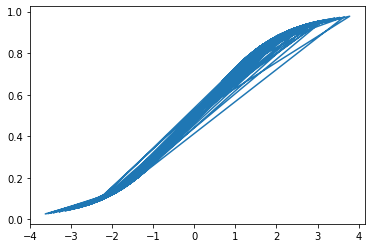

In [ ]:
g=segmoid[:,0]
f = 1.0/(1+np.exp(-g))
plt.plot(g,f)
plt.show()
plot_2d(g,f)

In [ ]:
def plot_decision_boundary(values):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(values) 
    mid = len(values)//2
    falses = values[0:mid]
    trues = values[mid+1 : 2*mid]


    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')
    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    
    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()


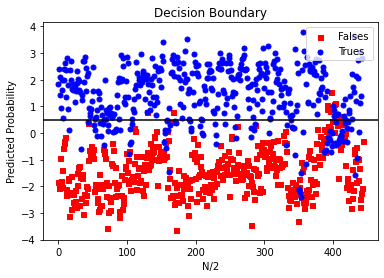

In [ ]:
plot_decision_boundary(segmoid[:,0])

#Splitting the Data

In [ ]:
X_LDA = X_LDA.drop(columns=['output'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_LDA,Y ,test_size = 0.3)

print(x_train,y_train,x_test,y_test)


          LDA
143 -0.498307
134 -0.359367
750  3.260360
790 -0.830210
227 -2.004275
..        ...
420 -1.816913
334 -2.325777
649  2.128164
844  0.008094
666  2.384356

[621 rows x 1 columns] 143    0
134    0
750    1
790    1
227    0
      ..
420    0
334    0
649    1
844    1
666    1
Name: result, Length: 621, dtype: int64           LDA
552  0.324879
431 -0.756407
619  2.116946
232 -1.062279
448  2.101494
..        ...
802  0.052856
793  1.036725
375 -0.391596
841  0.071418
175 -2.600263

[267 rows x 1 columns] 552    1
431    0
619    1
232    0
448    1
      ..
802    1
793    1
375    0
841    1
175    0
Name: result, Length: 267, dtype: int64


#Machine Learning Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Fitting logistic regression to the training set
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

#prediction the test rsesults
y_pred = model.predict(x_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))



Accuracy score :  0.9400749063670412


In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train,y_train)
print('Accuracy : ',model.score(x_test,y_test)*100)

Accuracy :  94.00749063670412


In [ ]:
#SVM
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train, y_train)
print('Accuracy : ',model.score(x_test,y_test)*100)


Accuracy :  94.00749063670412
